<a href="https://colab.research.google.com/github/Andurazo/Project-9-Showz/blob/main/Proyecto_S9_Showz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción

A través de este análisis se busca encontrar las respuestas a las interrogantes que pueden ser guías para las futuras estrategias del departamento de marketing de Showz.
Examinaremos temas como el comportamiento del cliente, para describir como interactuan con la plataforma, que secciones visitan con mayor frecuencia y cuales son los factores que influyen en su decision de compra. Temas relacionados con el ciclo de compra, el valor del cliente y el retorno de la inversion o ROI.

Para abordar estas preguntas llevaremos a cabo un análisis exhaustivo de los datos usando técnicas estadísticas y herramientas de visualización. Identificaremos patrones, anomalías y tendencias en los datos, Trataremos de segmentar a los clientes de acuerdo a características dentro de tiempos determinados (cohortes) y trataremos de predecir su LTV asi como el CAC.

Al finalizar este proyecto, se espera obtener una comprensión profunda del comportamiento de los clientes de Showz y de la efectividad de las estrategias de marketing actuales. Esperemos que los resultados sean útiles para optimizar la asignación del presupuesto, ofrecer una campaña de marketing que sea más eficaz y más acorde a las necesidades de la empresa, mejorar la tasa de conversión y aumentar el LTV del cliente.

#Paso 1. Acceda los datos y prepáralos para el análisis

In [ ]:
import math
import numpy as np
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from google.colab import drive


drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/visits_log_us.csv'
file_path2 = '/content/drive/MyDrive/orders_log_us.csv'
file_path3 = '/content/drive/MyDrive/costs_us.csv'


visits = pd.read_csv(file_path)
orders = pd.read_csv(file_path2)
costs = pd.read_csv(file_path3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Se importan las librerías necesarias y se leen los archivos csv para su análisis posterior, se les nombra visits, orders y costs respectivamente*

In [ ]:
print(visits.info())
print("\n" + "*")
print(orders.info())
print("\n" + "*")
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None

*
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

*
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     ---------

*se hace el info() para analizar los dataframes de mejor manera y ver de cuantas filas y columnas se compone. No se detectan valores duplicados ni ausentes*

#Paso 2. Haz informes y calcula métricas

**Visitas:**
**1. ¿Cuántas personas lo usan cada día, semana y mes?**

In [ ]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits[['Start Ts', 'End Ts']].dtypes

,0
Start Ts,datetime64[ns]
End Ts,datetime64[ns]


*Se transforman las columnas arriba señaladas a datetime64 para poder hacer operaciones a la postre, ya que se encontraban en el tipo object*

In [ ]:
visits.rename(
    columns={
    'Device' : 'device',
    'End Ts' : 'end_ts',
    'Source Id' : 'source_id',
    'Start Ts' : 'start_ts',
    'Uid' : 'uid'
},
    inplace=True
    )

visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

*Se renombra las columnas a nombres en minúsculas rellenando los espacios con _ para evitar errores al momento de referise a ellas durante el resto del análisis*

In [ ]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [ ]:
visits['date'] = visits['start_ts'].dt.date
visits['week'] = visits['start_ts'].dt.isocalendar().week
visits['month'] = visits['start_ts'].dt.month

visits.head()

,device,end_ts,source_id,start_ts,uid,date,week,month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12


*Se crean columnas aparte para día (fecha), semana y mes para poder obtener el número de usuarios que acceden a la plataforma por día, semana y mes*

In [ ]:
dau = (visits
    .groupby('date')
    .agg({'uid':'nunique'})
    .mean()
)

wau = (visits
    .groupby('week')
    .agg({'uid':'nunique'})
    .mean()
)

mau = (visits
    .groupby('month')
    .agg({'uid':'nunique'})
    .mean()
)

print('En promedio por día acceden a la plataforma', int(dau.iloc[0]), 'usuarios')
print('En promedio por semana acceden a la plataforma', int(wau.iloc[0]), 'usuarios')
print('En promedio por mes acceden a la plataforma', int(mau.iloc[0]), 'usuarios')

En promedio por día acceden a la plataforma 907 usuarios
En promedio por semana acceden a la plataforma 5825 usuarios
En promedio por mes acceden a la plataforma 23228 usuarios


*Se obtiene el DAU, WAU y MAU que son los indicadores que te ayudan a obtener los usuarios por día, mes y año; Se crean 3 prints para tener más claridad en el código, se usa int para usar un número entero en lugar de muchos decimales para tener un output más significativo*

**2. ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión)**

In [ ]:
avg_session_per_day = (visits.groupby('date').agg({'uid':'count'}).mean())
print('En promedio hay', int(avg_session_per_day.iloc[0]), 'sesiones por día')

En promedio hay 987 sesiones por día


*Se obtiene el promedio de las sesiones por día agrupando visits por date agregando el conteo de usuarios y se usa un print para claridad usando un número entero de sesiones por día*

**3. ¿Cuál es la duración de cada sesión?**

In [ ]:
visits['duration'] = (visits['end_ts']-visits['start_ts']).dt.seconds
print('La duración promedio de cada sesión es de:', (visits['duration'].mean()/60).round(3), 'minutos')

La duración promedio de cada sesión es de: 10.725 minutos


*Se resta de la columna end_ts la columna start_ts y se extraen los segundos, se hace un print para mayor claridad se le saca el promedio y se divide entre 60 para obtener los minutos y que se vea más objetivo. Se le agrega la función round para limitar el número de decimales a tres*

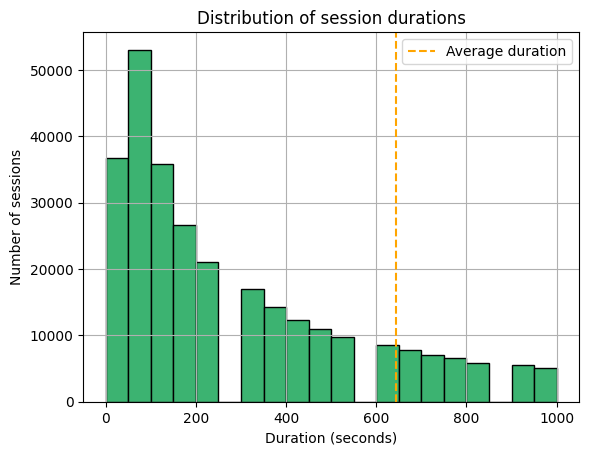

In [ ]:
visits['duration'].hist(bins=20, range=(0, 1000), color = 'mediumseagreen', edgecolor = 'black')

plt.title('Distribution of session durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of sessions')

plt.axvline(visits['duration'].mean(), color='orange', linestyle='--', label='Average duration')

plt.legend()
plt.show()

*Graficamos en forma de un histograma, donde mostramos la distribución de las duraciones de las sesiones, mostramos el valor de la duración promedio y en los ejes Duración en segundos (x) y el número de sesiones (y). En base a un análisis inicial vemos que la gran mayoría de las sesiones son de duración corta y se concentran en la parte izquierda de la gráfica; lo cual sugiere que muchos usuarios realizan visitas rápidas a la plataforma. No se detectan muchos outliers (valores atípicos) lo cual denota una distribución homogénea relativamente hablando y con poca variabilidad*

In [ ]:
print('La moda de la duración de cada sesión es de:', int(visits['duration'].mode().iloc[0]), 'segundos')

La moda de la duración de cada sesión es de: 60 segundos


*Se hace una gráfica para evaluar la distribución de la duración promedio de cada sesión, como no es normal, no nos conviene usar la media o la mediana, sacamos la moda y hacemos un print para darle más claridad*

**4. ¿Con qué frecuencia los usuarios regresan?**

In [ ]:
sticky_wau = round((dau/wau*100).iloc[0],3)
sticky_mau = round((dau/mau*100).iloc[0],3)

print('La frecuencia semanal con la que los usuarios regresan a la plataforma es de', sticky_wau, '%')
print("\n")
print('La frecuencia mensual con la que lo usarios regresan a la plataforma es de', sticky_mau, '%')

La frecuencia semanal con la que los usuarios regresan a la plataforma es de 15.587 %


La frecuencia mensual con la que lo usarios regresan a la plataforma es de 3.909 %


*Se obtienen los factores sticky de los usuarios activos diarios por semana y por mes. Denotan valores de 15.587 % y 3.909% respectivamente, lo que denota baja tasa de retención de clientes que puede ser derivado a un engagement bajo, plataforma de nicho o falta de contenido frecuente y relevante*

**Ventas:**

**5. ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)**


In [ ]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
orders.rename(
    columns={
    'Buy Ts' : 'buy_ts',
    'Revenue' : 'revenue',
    'Uid' : 'uid'
},
    inplace=True
    )

*Se convierte la columna Buy Ts a datetime para poder hacer operaciones en ella así como renombrar las columnas para evitar errores al momento de la redacción, así como se hizo en el caso de visits*

In [ ]:
first_session_time = visits.groupby('uid')['start_ts'].min()
first_order_time = orders.groupby('uid')['buy_ts'].min()

first_session_time.name = 'first_session_time'
first_order_time.name = 'first_order_time'

orders = orders.join(first_order_time, on='uid')
orders = orders.join(first_session_time, on='uid')

orders['lead_time'] = ((orders['first_order_time'] - orders['first_session_time']).dt.seconds)/(60)

orders.head()

,buy_ts,revenue,uid,first_order_time,first_session_time,lead_time
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,15.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,27.0


*Se realizan dos agrupamientos, uno por el df visits y otro por orders usando uid (ID de usuario) y tanto el inicio de sesión (start_ts) y la sesión de compra (buy_ts) vamos a llamarlos first_session_time y first_order_time para que tengan mayor objetividad al momento del análisis, despues los unificamos con un join a través de uid. Finalmente creamos una columna llamada leadtime que obtenemos restando los valores de la columna first_order_time y first_session_time, pero como lo saca en segundos dividimos entre 60 para tener el valor en minutos*

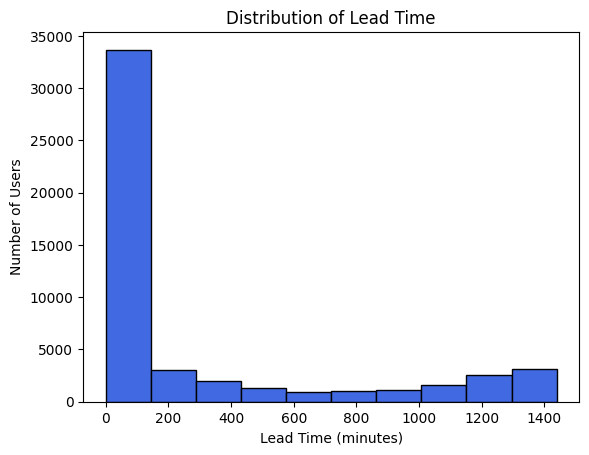

In [ ]:
plt.hist(orders['lead_time'], color = '#4169E1', edgecolor='black')
plt.xlabel('Lead Time (minutes)')
plt.ylabel('Number of Users')
plt.title('Distribution of Lead Time')
plt.show()

*Realizamos un histograma para ilustrar mejor la nueva columna de leadtime que acabamos de crear, donde el eje x son el leadtime en minutos y el eje y es la cantidad de usuarios. Observando esta gráfica apreciamos que la mayor parte de los usuarios hacen su 1ra compra denro de las primeras horas/días de su primera visita. Conforme el tiempo avanza también lo hace el número de usuarios que realiza compras, lo cual sugiere que la probabilidad de que lo haga disminuye con el tiempo si no lo hace en los primeros días o semanas. Asímismo vemos que existe una especie de "cola" en la gráfica donde los valores se muestran reducidos pero no alcanzan el cero lo que sugiere que hay número abundante de "compradores ocasionales"*

**6. ¿Cuántos pedidos hacen durante un período de tiempo dado?**

In [ ]:
orders['first_order_month'] = pd.to_datetime(orders['first_order_time'])
orders['order_month'] = pd.to_datetime(orders['buy_ts'])

orders['first_order_month'] = orders['first_order_time'].dt.to_period('M')
orders['order_month'] = orders['buy_ts'].dt.to_period('M')

orders['cohort_lifetime'] = (orders['order_month'] - orders['first_order_month']).apply(lambda x: x.n)

orders.head()

,buy_ts,revenue,uid,first_order_time,first_session_time,lead_time,first_order_month,order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1.0,2017-06,2017-06,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11.0,2017-06,2017-06,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2.0,2017-06,2017-06,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,15.0,2017-06,2017-06,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,27.0,2017-06,2017-06,0


*Se convierten las columnas first_order_month & order_month al tipo datetime para poder realizar operaciones con ellas, despues extraemos el mes y año de ambas; creamos otra columna llamada cohort_lifetime para obtener la cantidad de meses transcurridos entre el primer pedido y cada pedido subsecuente para cada usuario, restamos los valores del mes del primer pedido de los de el mes del pedido, usamos lambda para extraer el número de meses*

In [ ]:
order_output = orders.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='uid',
    aggfunc='count',
)

order_output.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,2354.0,177.0,174.0,226.0,292.0,218.0,276.0,174.0,212.0,153.0,96.0,86.0
2017-07,2186.0,100.0,120.0,104.0,72.0,82.0,61.0,50.0,58.0,24.0,53.0,
2017-08,1533.0,108.0,100.0,81.0,85.0,62.0,49.0,78.0,46.0,46.0,,
2017-09,2933.0,219.0,161.0,164.0,67.0,109.0,108.0,56.0,61.0,,,
2017-10,4964.0,314.0,162.0,122.0,129.0,103.0,86.0,125.0,,,,
2017-11,4813.0,397.0,182.0,211.0,136.0,59.0,102.0,,,,,
2017-12,5052.0,270.0,202.0,179.0,86.0,105.0,,,,,,
2018-01,3783.0,224.0,159.0,64.0,78.0,,,,,,,
2018-02,4095.0,222.0,83.0,70.0,,,,,,,,


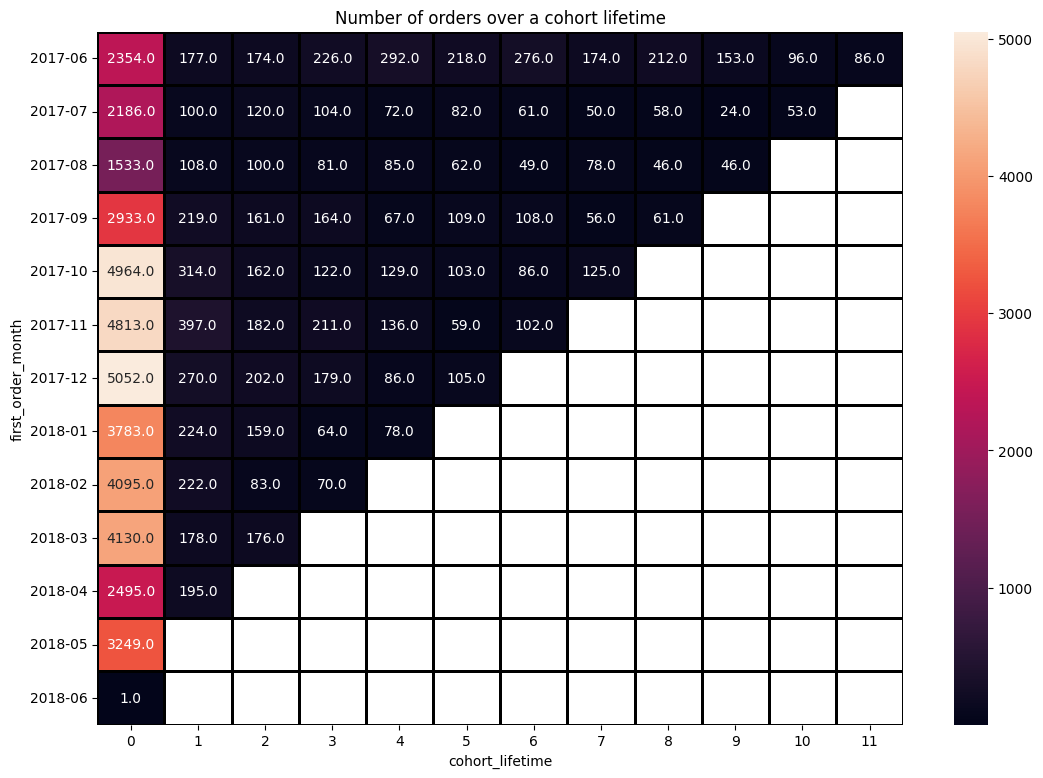

In [ ]:
plt.figure(figsize=(13, 9))
plt.title('Number of orders over a cohort lifetime')
plt.xlabel('Cohort Lifetime (Months)')
plt.ylabel('First Order Month')
order_heatmap = sns.heatmap(
    order_output,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='black',
)

*Se realiza una tabla dinámica con las nuevas columnas que hemos generado del df orders, para poder apreciar los datos de mejor manera los convertimos en heatmap donde cada fila representa una cohorte y cada columna la vida útil de la cohorte. En base a los datos se puede observar una tendencia a la baja en cuanto al número de pedidos a medida que aumenta la vida útil de la cohorte. Lo cual sugiere que en su mayoría los clientes realizan sus compras al inicio de su relación con la empresa y eso disminuye con el tiempo.
Se aprecian diferencias entre los diferentes cohortes, algunas muestran retención de clientes más alta que otras, lo cual quiere decir que mantiene un mayor número de clientes activos. Los cohortes que tienen filas con colores más intensos en los 1ros meses vendrían siendo los más importantes para las utilidades de la plataforma debido a que simbolizan un mayor número de pedidos*  

**7. ¿Cuál es el tamaño promedio de compra?**

In [ ]:
grouped_order_cohorts = orders.groupby(['first_order_month', 'cohort_lifetime']).agg({'revenue': 'sum', 'uid': 'nunique'})

grouped_order_cohorts['revenue_per_user'] = (grouped_order_cohorts['revenue'] / grouped_order_cohorts['uid'])

grouped_order_cohorts.columns = ['revenue_total', 'number_of_users', 'revenue_per_user']

grouped_order_cohorts.head()

revenue_total  number_of_users  \
first_order_month cohort_lifetime                                   
2017-06           0                      9557.49             2023   
                  1                       981.82               61   
                  2                       885.34               50   
                  3                      1931.30               54   
                  4                      2068.58               88   

                                   revenue_per_user  
first_order_month cohort_lifetime                    
2017-06           0                        4.724414  
                  1                       16.095410  
                  2                       17.706800  
                  3                       35.764815  
                  4                       23.506591

*Se crea un grupo llamado grouped_order_cohorts donde se agrupan el mes del primer pedido y el lifetime del cohorte, agregaremos columnas llamadas revenue_total con la suma de las ganancias, number_of_users para el num. de usuarios y revenue_per_user para la ganancia por usuario. Se obtiene el tamaño promedio de compra dividiendo por usuario dividiendo la ganancia entre el ID de usuario*

**8. ¿Cuánto dinero traen? (LTV)**

In [ ]:
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

cohorts = orders.groupby(['first_order_month','cohort_lifetime', 'order_month']).agg({'revenue': 'sum'}).reset_index()

report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

report['ltv'] =  report['revenue'] / report['n_buyers']

report.head()

,first_order_month,n_buyers,cohort_lifetime,order_month,revenue,ltv
0,2017-06,2023,0,2017-06,9557.49,4.724414
1,2017-06,2023,1,2017-07,981.82,0.485329
2,2017-06,2023,2,2017-08,885.34,0.437637
3,2017-06,2023,3,2017-09,1931.30,0.954671
4,2017-06,2023,4,2017-10,2068.58,1.022531


In [ ]:
ltv_output = report.pivot_table(
    index='first_order_month', columns='cohort_lifetime', values='ltv', aggfunc='mean'
).round(2)

ltv_output.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02,4.16,0.28,0.08,0.07,,,,,,,,


*Calculamos el número de nuevos usuarios por mes, al cual llamamos cohort_sizes, después realizamos un cohorte donde agrupamos por el dataframe orders por el mes del 1er pedido, el tiempo de vida del cohorte y el mes de la compra, agregamos la ganancia total y reiniciamos el index. Creamos un merge llamado report donde unimos tanto a cohort_sizes como a cohorts usando first_order_month para unirlos. Con esto y tomando en cuenta que no contamos con el margin rate para poder sacar el LTV sobre la base del beneficio bruto, lo jharemos a través de los ingresos. Creamos una columna llamada ltv que se obtiene dividiendo los valores de la columna revenue entre n_buyers*

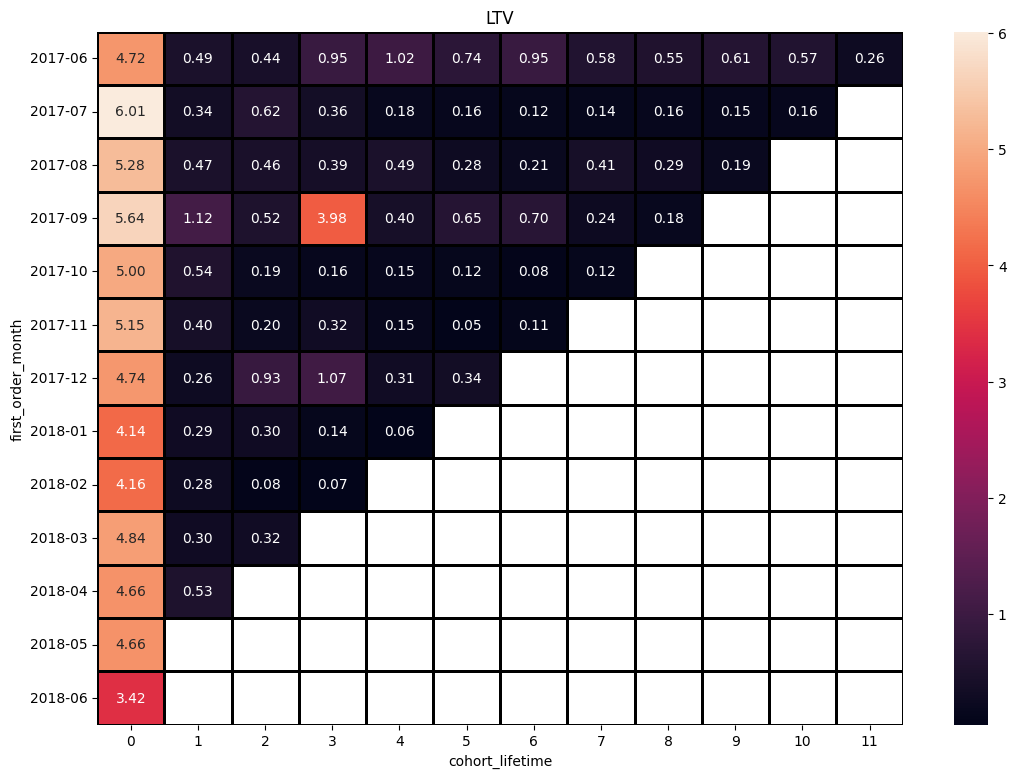

In [ ]:
plt.figure(figsize=(13, 9))
plt.title('LTV')
plt.xlabel('Cohort Lifetime (Months)')
plt.ylabel('First Order Month')
order_heatmap = sns.heatmap(
    ltv_output,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)


*Hacemos un gráfico de heatmap llamado LTV, donde el eje x es la vida del cohorte y el y es el mes del 1er pedido. En base a un análisis del gráfico podemos destacar que algunas cohortes presentan un LTV más alto que otras (2017) lo cual sugiere que fueron valiosas para Showz. Sin embargo, parece haber una tendencia a la baja a medida que aumenta el tiempo de vida de la cohorte; lo cual pudiera indicar una disminución en la frecuencia de las compras. De igual manera, la variabilidad entre cohortes podria ser indicativo de que hay factores como las campañas de mercadotecnia, cambios en productos o las condiciones de mercado que pudieran haber tenido un impacto en el LTV de los usuarios*  

**Marketing:**
**9. ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)**

In [ ]:
costs['dt'] = pd.to_datetime(costs['dt'])

costs.rename(
    columns={
    'dt' : 'date'
},
    inplace=True
    )

mkt_costs = costs['costs'].sum()
print('El departamento de Marketing se ha gastado $', mkt_costs)

El departamento de Marketing se ha gastado $ 329131.62


*De igual manera a los dos dataframes anteriores se convierte la columna dt a tipo datetime64 para poder hacerla más fácil de manipular, se renombre de dt a date para tener mayor claridad al momento de declararla. También se suma el total de la columna costs del dataframe del mismo nombre y se hace un print para expresarlo mejor*

In [ ]:
expenses_per_source['percentage'] = expenses_per_source['costs'] / (costs['costs'].sum()) *100

expenses_per_source

,source_id,costs,percentage
0,1,20833.27,6.329769
1,2,42806.04,13.005751
2,3,141321.63,42.937725
3,4,61073.60,18.555981
4,5,51757.10,15.725350
5,9,5517.49,1.676378
6,10,5822.49,1.769046


*Hacemos una tabla llamada expenses_per_source (Gastos por fuente) para identificar los gastos de cada fuente de adquisición y agregamos una columna llamada porcentaje para identificar de una manera más clara las divisiones entre los mismos gastos*

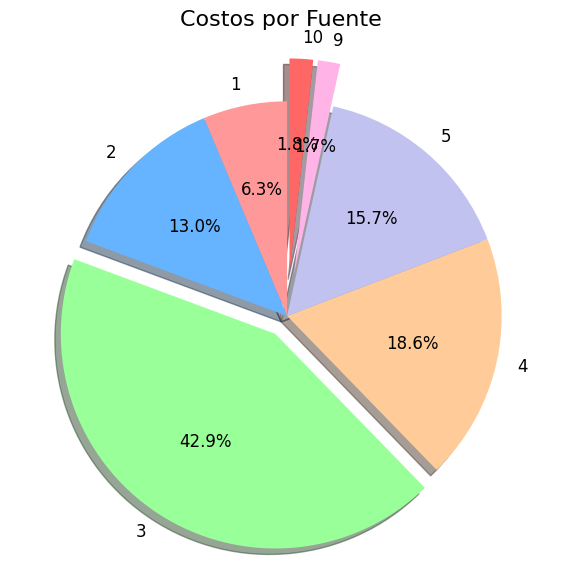

In [ ]:
data = {'source_id': [1, 2, 3, 4, 5, 9, 10],
        'costs': [20833.27, 42806.04, 141321.63, 61073.60, 51757.10, 5517.49, 5822.49],
        'percentage': [6.33, 13.01, 42.94, 18.56, 15.73, 1.68, 1.77]}

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6', '#ff6666']

explode = (0, 0, 0.1, 0, 0, 0.2, 0.2)

plt.figure(figsize=(7, 7))
plt.pie(data['percentage'], labels=data['source_id'], autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode, shadow=True, textprops={'fontsize': 12})

plt.title('Costos por Fuente', fontsize=16)
plt.axis('equal')
plt.show()


*Hacemos una gráfica de pastel para visualizar mejor los porcentajes correspondientes a cada una de las fuentes de adquisición de clientes, se tiñen de varios colores para distinguir mejor y se especifican los porcentajes de igual manera de cada fuente. Observamos una dominancia clave de la fuente 3 que concentra el mayor porcentaje de los costos totales, lo cual quiere decir que es la que más contribuye a los gastos totales. La fuente 9 & 10 tienen la menor participación, lo cual quiere decir que son las menos relevantes. Analizando a fondo vemos una distribución desigual donde una fuente concentra la mayor parte mientras que las demás lo reparten de manera poco mas equilibrada*

In [ ]:
expenses_per_month = costs.groupby('month').agg({'costs':'sum'}).reset_index()
expenses_per_month['percentage'] = expenses_per_month['costs'] / (costs['costs'].sum()) *100

expenses_per_month

,month,costs,percentage
0,2017-06,18015.00,5.473494
1,2017-07,18240.59,5.542035
2,2017-08,14790.54,4.493807
3,2017-09,24368.91,7.404001
4,2017-10,36322.88,11.035974
5,2017-11,37907.88,11.517544
6,2017-12,38315.35,11.641346
7,2018-01,33518.52,10.183926
8,2018-02,32723.03,9.942232
9,2018-03,30415.27,9.241066


*Se hace un nuevo agrupamiento llamado expenses_per_month donde se compilaran los gastos mensuales, se extraen los porcentajes de manera similar al agrupamiento anterior, para no perder objetividad*

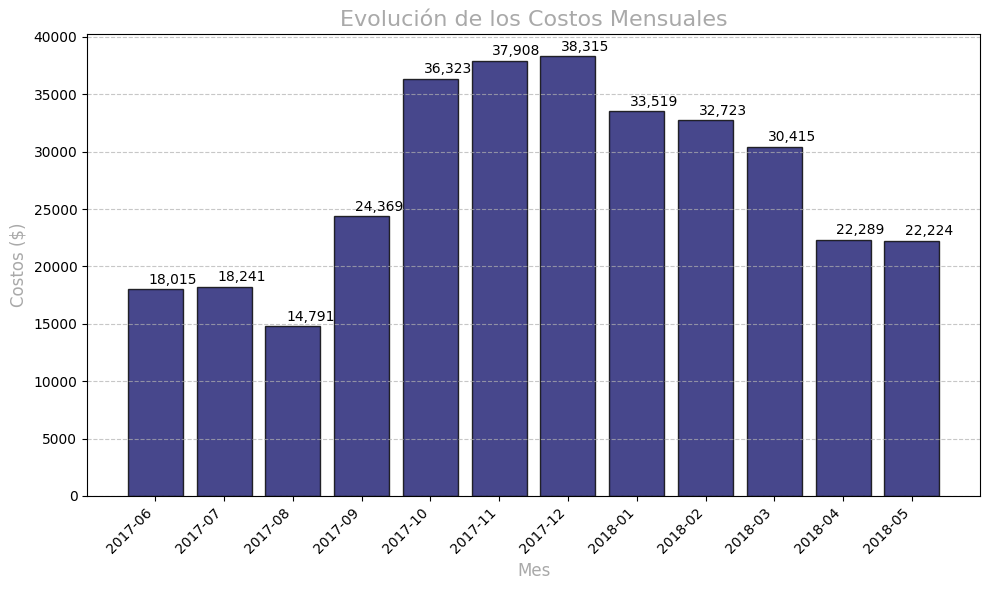

In [ ]:
meses = ['2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
         '2018-01', '2018-02', '2018-03', '2018-04', '2018-05']
costos = [18015.00, 18240.59, 14790.54, 24368.91, 36322.88, 37907.88, 38315.35,
          33518.52, 32723.03, 30415.27, 22289.38, 22224.27]

plt.figure(figsize=(10, 6))
bars = plt.bar(meses, costos, color='midnightblue', edgecolor='black', alpha=0.8)

plt.xlabel('Mes', fontsize=12, color='darkgray')
plt.ylabel('Costos ($)', fontsize=12, color='darkgray')
plt.title('Evolución de los Costos Mensuales', fontsize=16, color='darkgray')

plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 500, f'{yval:,.0f}',
             fontsize=10, color='black')

plt.tight_layout()
plt.show()


*Se realiza una gráfica de barras para poder comparar los montos con respecto a cada mes, podemos observar que la tendencia general es a aumentar desde mediados de 2017, sin embargo, iniciando el 2018 se observa una disminución. Vemos que hay picos en noviembre y diciembre de 2017, y en enero de 2018; podemos suponer que fue por los incrementos en gastos naturales por finales de año y principios del siguiente (época navideña). Vemos también que apartir de abril de 2018 se mantiene cierta estabilidad*

**10. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?**

In [ ]:
sources = visits.groupby('source_id').agg({'uid': 'nunique'}).reset_index()
sources.columns = ['source_id', 'n_visitors']

expenses_per_source = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()

report_cac = sources.join(expenses_per_source['costs'], how='left', on = 'source_id')
report_cac['cac'] = report_cac['costs'] / report_cac['n_visitors']

report_cac

,source_id,n_visitors,costs,cac
0,1,18999,42806.04,2.253068
1,2,26245,141321.63,5.384707
2,3,74756,61073.60,0.816973
3,4,83525,51757.10,0.619660
4,5,56974,5517.49,0.096842
5,6,6,5822.49,970.415000
6,7,34,NaN,NaN
7,9,9264,NaN,NaN
8,10,8067,NaN,NaN


*Para obtener el CAC creamos una tabla llamada sources para agrupar el dataframe visits por la id de la fuente y agregamos otra columna con el número de usuarios para saber cuantos usuarios vinieron de que fuente. Despues sacamos los gastos por fuente agrupando el dataframe costs por id de la fuente y agregamos el total de los costos. Por último creamos una nueva tabla llamada report_cac para juntar sources y expenses_per_source que recién creamos y ahi agregamos una columna con el CAC. Este último lo calculamos dividiendo los valores de la columna costs entre la de n_visitors*

**11. ¿Cuán rentables eran las inversiones? (ROMI)**

In [ ]:
costs['date'] = pd.to_datetime(costs['date'])
costs['month'] = costs['date'].dt.to_period('M')

monthly_costs = costs.groupby('month').agg({'costs': 'sum'}).reset_index()
monthly_costs.head()

,month,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88


*Para obtener el ROMI (Return on Marketing Investment) primero convertimos la columna date del df costs en datetime64 y extraemos el mes y el año, nombramos a esta nueva columna month para identificarla de mejor manera. Creamos una tabla llamada monthly_costs donde agrupamos por la columna recien creada month y agregamos la suma de los costos*

In [ ]:
super_report = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
super_report['cac'] = super_report['costs'] / super_report['n_buyers']
super_report.head()

,first_order_month,n_buyers,cohort_lifetime,order_month,revenue,ltv,month,costs,cac
0,2017-06,2023,0,2017-06,9557.49,4.724414,2017-06,18015.0,8.905091
1,2017-06,2023,1,2017-07,981.82,0.485329,2017-06,18015.0,8.905091
2,2017-06,2023,2,2017-08,885.34,0.437637,2017-06,18015.0,8.905091
3,2017-06,2023,3,2017-09,1931.30,0.954671,2017-06,18015.0,8.905091
4,2017-06,2023,4,2017-10,2068.58,1.022531,2017-06,18015.0,8.905091


*Se crea un merge llamado super_report donde fusionamos monthly_costs (costos mensuales) con report que ya habíamos creado antes. Creamos una columna con el CAC (ya obtenido anteriormente) y mostramos las primeras 5 filas*

In [ ]:
super_report['romi'] = super_report['ltv'] / super_report['cac']
romi_output = super_report.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='romi',
    aggfunc='mean')

cum_romi = romi_output.cumsum(axis=1).round(2)
cum_romi.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02,0.46,0.49,0.5,0.51,,,,,,,,


*Creamos otra columna en la misma tabla que recien creamos, la nombramos romi, apartir de dividir LTV entre CAC, creamos una tabla dinámica con el método cumsum y hacemos un mapa de calor para poder visualizarlo de mejor manera*

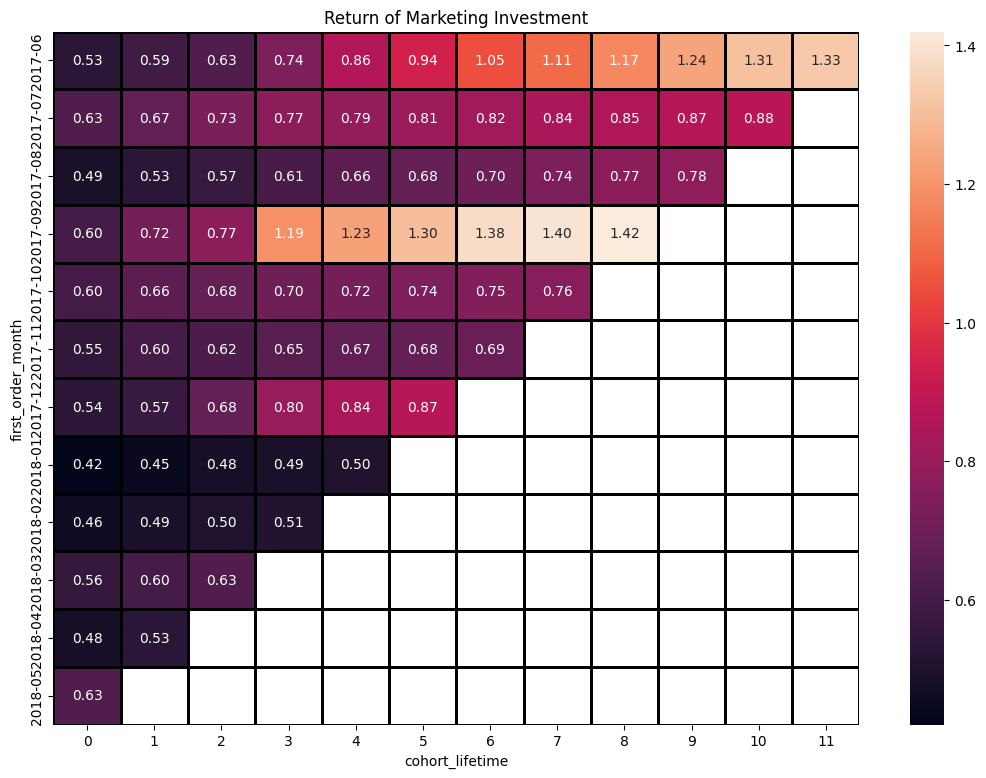

In [ ]:
plt.figure(figsize=(13, 9))
plt.title('Return of Marketing Investment')
romi_heatmap = sns.heatmap(
    cum_romi,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)

*Se visualizan los datos en un heatmap para poder ilustrar el retorno sobre la inversión en marketing o ROMI, podemos apreciar una variabilidad en el ROMI a través del tiempo entre los diferentes cohortes. Esto se podría interpretar como que tuvieron efecto sobre estos diversos factores como las condiciones de mercado, características de cada cohorte y probablemente campañas de marketing. A pesar de estas variaciones parece que hay una tendencia general que es propenso a patrones estacionales, ya que hay variabilidad en cuanto al rendimiento depende de la época del año. Parece ser que algunos cohortes generan un ROMI más alto que otros, con la información disponible no podemos saber si estas diferencias radican en características como edad, género o intereses, pero de igual manera no se puede descartar. En promedio parece que los cohortes empiezan a cubrir los costos de marketing hacia el final del 7mo mes, parece que conforme los gastos se incrementaron también el número de usuarios nuevos. En base a esto pareceria ser que después de 7 meses se alcanza un punto de equilibrio*


#Paso 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

**¿Qué fuentes/plataformas recomendarías?  Fundamenta tu selección: ¿en qué métricas te enfocaste?  ¿Por qué? ¿Qué conclusiones sacaste después de encontrar los valores métricos?**

En base al análisis realizado con los datos de visitas, pedidos y costos se puede recomendar lo siguiente:
Aumentar la inversión en las fuentes de adquisición 2, 3 y 4; ya que estas fuentes han demostrado tener un CAC inferior, lo cual indica que son más eficientes en convertir visitas en clientes potenciales. Asignando más recursos a estos canales  se puede obtener un mayor número de clientes a un mejor costo.
Se podría considerar también las fuentes 9 y 10 debido a que cuentan con el potencial para generar tráfico que a su vez se puede traducer en nuevos clientes. Se podría trabajar en pruebas o campañas para evaluar que tan eficaces pueden ser.  También se debería reducir la inversión realizada en la fuente 6, dado el CAC asociado podría ser beneficioso reevaluar su rendimiento.
La métrica que se usa para emitir estas recomendaciones es el CAC, la cual es vital para evaluar la eficiencia de los esfuerzos del departamento de mercadotecnia.
Analizando este valor métrico podemos identificar los canales más rentables, optimizar los recursos para concentrarnos en lo que de verdad funciona, coadyuvar a la toma de decisiones a nivel directivo basándonos en datos concretos y mejorar el retorno de la inversión en las campañas a realizar en lo posterior.
